In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Hitters.csv")
df = df.copy()
df.head()
#veri setimizde index problemi yok 


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
df.shape


(322, 20)

In [3]:
df.isnull().sum()
# salary değişkenlerimizde boş gözlemler bulunmaktadır 
# bunları ortalama ile dolduralım 


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df["Salary"].fillna(df.Salary.mean() , inplace = True)
# boş maaş değerlerini ortalama ile doldurduk aslında bunları ilerde tahmin ile dolduracağız

In [5]:
df.isnull().sum().any()
# datamızda boş değer var mı ? 


False

In [6]:
df.info()
# veri setimizdeki kategorik değişkenleri düzenliyelim 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       322 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


# Kategorik değişkenleri modellemeye hazır hale getirme 

In [7]:
from sklearn.preprocessing import LabelEncoder 
cat_list = ["NewLeague" , "Division" , "League"] 

lbe = LabelEncoder()
for i in cat_list:
    df[i] = lbe.fit_transform(df[i])

In [8]:
df.head(3)
# tip dönüşümlerini başarılı bir şekilde uyguladık 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,535.925882,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.000000,0


# Bagimli ve bağımsız değişken ayrışımı 

In [9]:
X = df.drop("Salary"  , axis = 1) # bagımsız degisken 

In [10]:
y = df["Salary"] #bagimli değisken 

# Veri setini Train_Test olarak ayırma

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# doğru parcalamışız

(257, 19)
(257,)
(65, 19)
(65,)


# Model Kurma


In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
cart_model = DecisionTreeRegressor()

In [16]:
cart_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

- max_leaf_nodes = mask yaprak düğümleri 
- min_samples_split = minnimum örnek bölme

In [17]:
y_pred = cart_model.predict(X_test)

In [18]:
np.sqrt( mean_squared_error( y_test , y_pred ) )

356.9851756250487

# Grafikte agaç düğüm noktalarının gösterilmesi 

- Bu işlem için veri setinden değişken seçeceğiz 

In [19]:
import matplotlib.pyplot as plt

hits = pd.DataFrame(X_train["Hits"])
cart_model_2 = DecisionTreeRegressor( max_leaf_nodes = 10,
                                     min_samples_split = 76

                                        ).fit(hits , y_train)

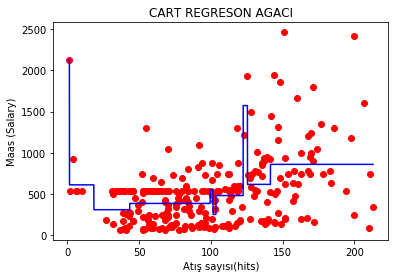

In [20]:


X_grid = np.arange(min( np.array(hits)), max(np.array(hits)) , 0.01)
X_grid = X_grid.reshape((len(X_grid) ,1))
plt.scatter(hits , y_train ,color = 'red')
plt.plot(X_grid , cart_model_2.predict(X_grid) , color = 'blue')
plt.title("CART REGRESON AGACI")
plt.xlabel("Atış sayısı(hits)")
plt.ylabel("Maas (Salary)");


- max_leaf_nodes değiştirdikçe grafikdeki düğümlerde değişiyor

- min_samples_split değiştirdikçe grafikdeki düğümlerde değişiyor


# Tahmin 

In [21]:
!pip install skompiler

In [22]:
from skompiler import skompile
# bu kutuphane sayesinde karar agacı yapımızın formulunu alıyoruz 


In [23]:
print( skompile(cart_model_2.predict).to('python/code') )

((2127.333 if x[0] <= 1.5 else (612.7407057034219 if x[0] <= 18.5 else ((
    312.1170025924646 if x[0] <= 43.5 else 387.95523905083786) if x[0] <= 
    99.5 else 553.6851764258555) if x[0] <= 101.5 else 254.52385714285714) if
    x[0] <= 103.5 else 483.467423888816) if x[0] <= 122.5 else 1572.7855 if
    x[0] <= 125.5 else 618.534254893677 if x[0] <= 141.5 else 860.9636424364423
    )



### Formulumuzle tahmin yaplım

In [24]:
x = [100]

In [25]:
((2127.333 if x[0] <= 1.5 else (612.740705703422 if x[0] <= 18.5 else 
    379.8379410646387 if x[0] <= 38.0 else 309.8567834727503) if x[0] <= 
    76.5 else 426.3250980143642 if x[0] <= 117.5 else 556.0925882129277) if
    x[0] <= 122.5 else (1245.1903333333332 if x[0] <= 125.5 else 
    632.5203215462611 if x[0] <= 141.5 else 863.4009529277566) if x[0] <= 
    199.0 else 1709.1666666666667)

426.3250980143642

# Model Tuning 

In [26]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV


In [27]:
cart = DecisionTreeRegressor()

cart_params = {"max_leaf_nodes" : np.arange(2 ,20 ),
              "min_samples_split" : np.arange(2 ,100 )}

cart_cv = GridSearchCV(cart,
                       cart_params,
                      cv=10,
                      n_jobs = -1,
                       verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 1764 candidates, totalling 17640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 5848 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 12640 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 17640 out of 17640 | elapsed:   13.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
cart_cv.best_params_

{'max_leaf_nodes': 15, 'min_samples_split': 32}

In [34]:
y_pred = cart_cv.predict(X_test)

In [35]:
np.sqrt( mean_squared_error(y_test , y_pred) )

307.188552679735